特征中的缺失值:
0
目标变量中的缺失值: 0

数据集完整，没有缺失值或无穷大值。
特征名称: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
数据集形状: (20640, 8)
目标变量形状: (20640,)
[1.03    3.821   1.726   0.934   0.965   2.648   1.573   5.00001 1.398
 3.156  ]
最佳alpha值: 0.001
均方误差 (MSE): 0.5539

模型回归系数:
MedInc: 0.4447
HouseAge: 0.0098
AveRooms: -0.1157
AveBedrms: 0.7412
Population: -0.0000
AveOccup: -0.0035
Latitude: -0.4185
Longitude: -0.4318
截距: -36.8255


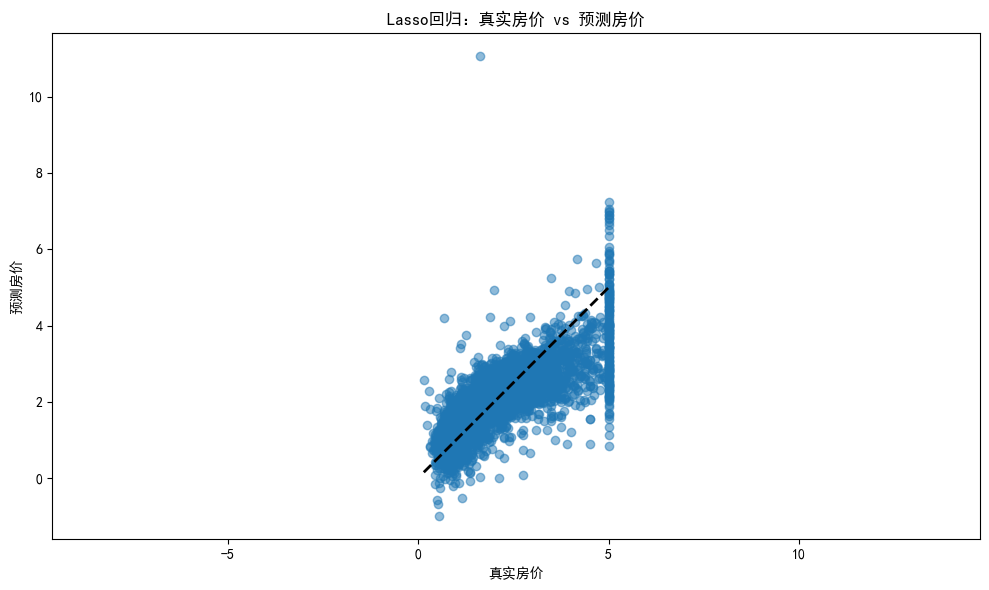

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# 加载加利福尼亚房价数据集
housing = fetch_california_housing(data_home='./data')
X = housing.data
y = housing.target
# 检查数据集中是否存在缺失值
missing_values = np.isnan(X).sum()
print("特征中的缺失值:")
print(missing_values)

missing_target = np.isnan(y).sum()
print(f"目标变量中的缺失值: {missing_target}")


# 数据完整性总结
if missing_values.sum() == 0 and missing_target == 0:
    print("\n数据集完整，没有缺失值或无穷大值。")
else:
    print("\n数据集存在缺失值或无穷大值，需要进行数据清洗。")

# 查看数据集信息
print("特征名称:", housing.feature_names)
print("数据集形状:", X.shape)
print("目标变量形状:", y.shape)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train[:10])
# 创建L1正则化线性回归模型（Lasso回归），使用网格搜索寻找最佳alpha值
from sklearn.model_selection import GridSearchCV

# 设置多个alpha值进行比较
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]

# 创建基础Lasso模型
lasso = Lasso(random_state=42)

# 设置网格搜索参数
param_grid = {'alpha': alphas}

# 创建网格搜索对象，使用均方误差作为评估指标
grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)

# 在训练集上进行网格搜索
grid_search.fit(X_train, y_train)

# 获取最佳alpha值
best_alpha = grid_search.best_params_['alpha']
print(f"最佳alpha值: {best_alpha}")

# 选择最佳模型
alpha = best_alpha
lasso_model = Lasso(alpha=alpha, random_state=42)

# 训练模型
lasso_model.fit(X_train, y_train)

# 预测
y_pred = lasso_model.predict(X_test)

# 评估模型,均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"均方误差 (MSE): {mse:.4f}")

# 保存模型
import joblib
joblib.dump(lasso_model, 'lasso_model.pkl')

# 查看模型回归系数
print("\n模型回归系数:")
for name, coef in zip(housing.feature_names, lasso_model.coef_):
    print(f"{name}: {coef:.4f}")
print(f"截距: {lasso_model.intercept_:.4f}")

# 可视化预测结果与真实值的对比
plt.figure(figsize=(10, 6))
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('真实房价')
plt.ylabel('预测房价')
plt.title('Lasso回归：真实房价 vs 预测房价')
plt.axis('equal')  # 设置x轴和y轴的比例相同
plt.tight_layout()
plt.show()


特征中的缺失值:
0
目标变量中的缺失值: 0

数据集完整，没有缺失值或无穷大值。
特征名称: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
数据集形状: (20640, 8)
目标变量形状: (20640,)
[1.03    3.821   1.726   0.934   0.965   2.648   1.573   5.00001 1.398
 3.156  ]

线性回归模型结果:
均方误差 (MSE): 0.5559

线性回归模型回归系数:
MedInc: 0.8544
AveRooms: 0.1225
AveBedrms: -0.2944
Latitude: 0.3393
Longitude: -0.0023
截距: 2.0719

梯度下降模型结果:
均方误差 (MSE): 0.5506

梯度下降模型回归系数:
MedInc: 0.8126
AveRooms: 0.1148
AveBedrms: -0.2503
Latitude: 0.3024
Longitude: 0.0023
截距: 2.0573

模型和标准化器已保存


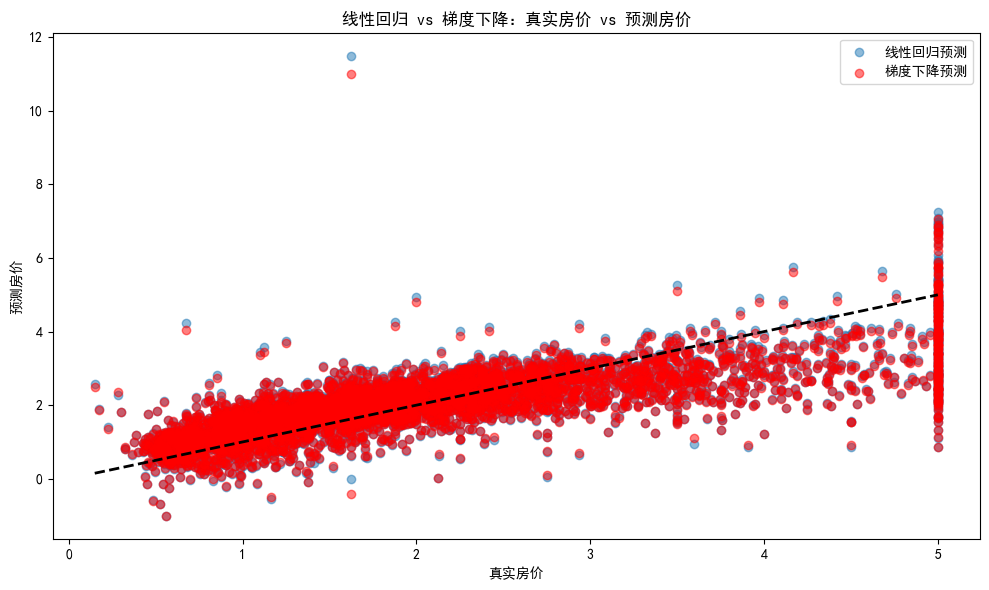

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

# 加载加利福尼亚房价数据集
housing = fetch_california_housing(data_home='./data')
X = housing.data
y = housing.target

# 检查数据集中是否存在缺失值
missing_values = np.isnan(X).sum()
print("特征中的缺失值:")
print(missing_values)

missing_target = np.isnan(y).sum()
print(f"目标变量中的缺失值: {missing_target}")

# 数据完整性总结
if missing_values.sum() == 0 and missing_target == 0:
    print("\n数据集完整，没有缺失值或无穷大值。")
else:
    print("\n数据集存在缺失值或无穷大值，需要进行数据清洗。")

# 查看数据集信息
print("特征名称:", housing.feature_names)
print("数据集形状:", X.shape)
print("目标变量形状:", y.shape)

# 去掉不显著的特征：HouseAge(1), AveOccup(5), Population(4)
# significant_features = [0, 2, 3, 6, 7]  # 保留MedIncome, AveRooms, AveBedrms, Latitude, Longitude
# X_significant = X[:, significant_features]
# feature_names_significant = [housing.feature_names[i] for i in significant_features]
# print("\n使用的特征:", feature_names_significant)


# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train[:10])

# 对特征进行标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. 创建普通线性回归模型
lr_model = LinearRegression()

# 训练模型
lr_model.fit(X_train_scaled, y_train)

# 预测
lr_y_pred = lr_model.predict(X_test_scaled)

# 评估模型,均方误差
lr_mse = mean_squared_error(y_test, lr_y_pred)
print("\n线性回归模型结果:")
print(f"均方误差 (MSE): {lr_mse:.4f}")

# 查看模型回归系数
print("\n线性回归模型回归系数:")
for name, coef in zip(feature_names_significant, lr_model.coef_):
    print(f"{name}: {coef:.4f}")
print(f"截距: {lr_model.intercept_:.4f}")

# 2. 创建梯度下降回归模型
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

# 训练模型
sgd_model.fit(X_train_scaled, y_train)

# 预测
sgd_y_pred = sgd_model.predict(X_test_scaled)

# 评估模型
sgd_mse = mean_squared_error(y_test, sgd_y_pred)
print("\n梯度下降模型结果:")
print(f"均方误差 (MSE): {sgd_mse:.4f}")

# 查看模型回归系数
print("\n梯度下降模型回归系数:")
for name, coef in zip(feature_names_significant, sgd_model.coef_):
    print(f"{name}: {coef:.4f}")
print(f"截距: {sgd_model.intercept_[0]:.4f}")

# 保存模型和标准化器
joblib.dump(lr_model, 'linear_regression_model.pkl')
joblib.dump(sgd_model, 'sgd_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("\n模型和标准化器已保存")

# 可视化两种模型预测结果与真实值的对比
plt.figure(figsize=(10, 6))
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

# 线性回归模型结果
plt.scatter(y_test, lr_y_pred, alpha=0.5, label='线性回归预测')
# 梯度下降模型结果
plt.scatter(y_test, sgd_y_pred, alpha=0.5, color='red', label='梯度下降预测')

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('真实房价')
plt.ylabel('预测房价')
plt.title('线性回归 vs 梯度下降：真实房价 vs 预测房价')
plt.legend()
plt.tight_layout()
plt.show()
